# Exp-5: Implementation of Denoising autoencoders

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, BatchNormalization
from tensorflow.keras.datasets.mnist import load_data

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

11490434/11490434 [==============================] - 2s 0us/step


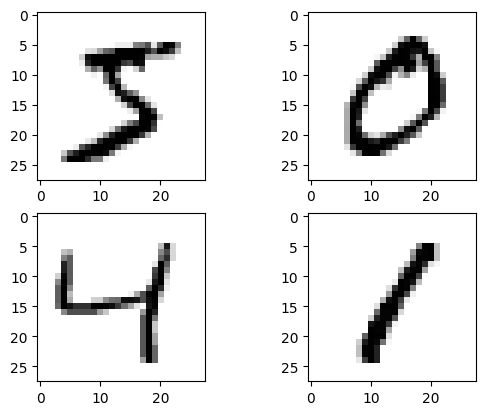

In [3]:
for i in range(4):
  plt.subplot(2, 2, i + 1)
  plt.imshow(X_train[i], cmap=plt.cm.binary)

In [4]:
X_train, X_test = X_train / 255., X_test / 255.
X_train = np.reshape(X_train, (X_train.shape[0], 28, 28, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 28, 28, 1))

### Adding Noise

In [5]:
factor = .3
X_train_noisy = X_train + factor * np.random.normal(loc=0.0, scale=1., size=X_train.shape)
X_test_noisy = X_test + factor * np.random.normal(loc=0.0, scale=1., size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

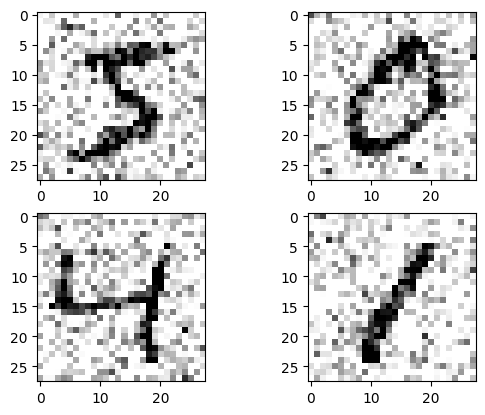

In [6]:
for i in range(4):
  plt.subplot(2, 2, i + 1)
  plt.imshow(X_train_noisy[i].reshape(1, 28, 28)[0], cmap=plt.cm.binary)

In [7]:
common_param = {
    'padding': 'same',
    'activation': 'relu'
}
model = Sequential([
    # Encoder
    Conv2D(16, (3, 3), **common_param, input_shape=(28, 28, 1)),
    BatchNormalization(),
    Conv2D(32, (3, 3), **common_param),
    BatchNormalization(),
    Conv2D(64, (3, 3), **common_param),

    # Decoder
    Conv2DTranspose(64, (3, 3), **common_param),
    BatchNormalization(),
    Conv2DTranspose(32, (3, 3), **common_param),
    BatchNormalization(),
    Conv2DTranspose(16, (3, 3), **common_param),

    Conv2D(1, (3, 3), **common_param)
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_transpose (Conv2DTr  (None, 28, 28, 64)        3

In [8]:
history = model.fit(X_train_noisy, X_train, batch_size=256, epochs=5, validation_data=(X_test_noisy, X_test))

Epoch 1/5
235/235 [==============================] - 32s 56ms/step - loss: 0.0223 - accuracy: 0.8083 - val_loss: 0.0847 - val_accuracy: 0.8077
Epoch 2/5
235/235 [==============================] - 10s 42ms/step - loss: 0.0058 - accuracy: 0.8151 - val_loss: 0.0081 - val_accuracy: 0.8142
Epoch 3/5
235/235 [==============================] - 10s 41ms/step - loss: 0.0054 - accuracy: 0.8152 - val_loss: 0.0054 - val_accuracy: 0.8143
Epoch 4/5
235/235 [==============================] - 10s 42ms/step - loss: 0.0051 - accuracy: 0.8152 - val_loss: 0.0049 - val_accuracy: 0.8142
Epoch 5/5
235/235 [==============================] - 10s 43ms/step - loss: 0.0050 - accuracy: 0.8152 - val_loss: 0.0053 - val_accuracy: 0.8142


### Model Evaluation Curve

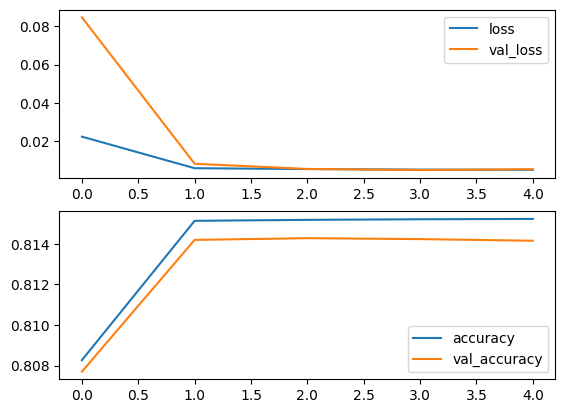

In [9]:
plt.subplot(2,1,1)
plt.plot( history.history['loss'], label = 'loss')
plt.plot( history.history['val_loss'], label = 'val_loss')
plt.legend(loc = 'best')

plt.subplot(2,1,2)
plt.plot( history.history['accuracy'], label = 'accuracy')
plt.plot( history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(loc = 'best')
plt.show()

### Final Output

1/1 [==============================] - 0s 20ms/step


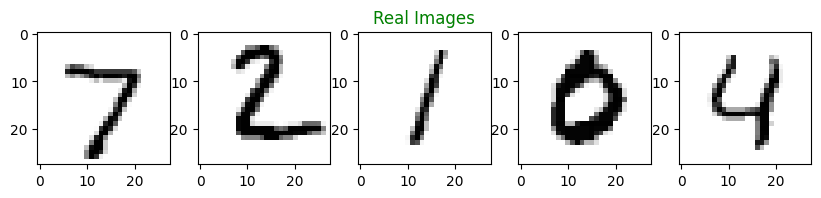

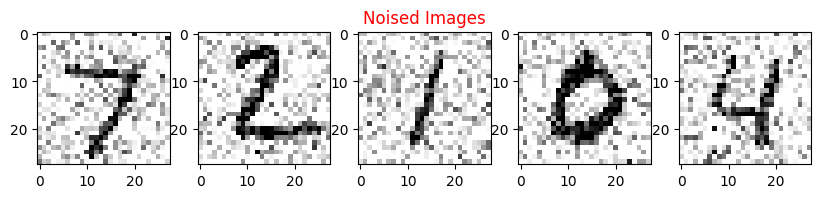

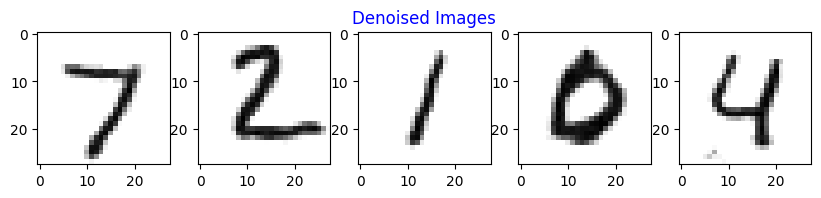

In [22]:
plt.figure(figsize=(10, 10))
for i in range(5):
  plt.subplot(5, 5, i + 1)
  if i == 2:
    plt.title("Real Images", color='green')
  plt.imshow(X_test[i].reshape(1, 28, 28)[0], cmap=plt.cm.binary)

plt.figure(figsize=(10, 10))
for i in range(5):
  plt.subplot(5, 5, i + 1)
  if i == 2:
    plt.title("Noised Images", color='red')
  plt.imshow(X_test_noisy[i].reshape(1, 28, 28)[0], cmap=plt.cm.binary)

plt.figure(figsize=(10, 10))
for i in range(5):
  plt.subplot(5, 5, i + 1)
  if i == 2:
    plt.title("Denoised Images", color='blue')
  plt.imshow(model.predict(X_test_noisy[i].reshape(1, 28, 28, 1)).reshape(1, 28, 28)[0], cmap=plt.cm.binary)